In [1]:
%matplotlib inline
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from typhon.files import FileSet

import yaml

with open('malawi_config.yaml') as config_file:
    config = yaml.safe_load(config_file)

In [2]:
Res = '0x0 0x1a 0x9 0x14 0x13 0x0'
Res.replace('0x', '').replace(' ', '')

'01a914130'

In [9]:
a = np.random.uniform(size=(1000, 100, 100))

In [11]:
%%timeit
for i in range(a.shape[0]):
    np.max(a[i])

19.4 ms ± 967 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
%timeit np.max(a)

9.42 ms ± 144 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [2]:
from ai4eo.preprocessing import ImageLoader
from typhon.files import FileSet
df = FileSet('/scratch-a/jmrziglod/sen2agri/data/summer_data/patches/reviewed/{label}/*').to_dataframe()

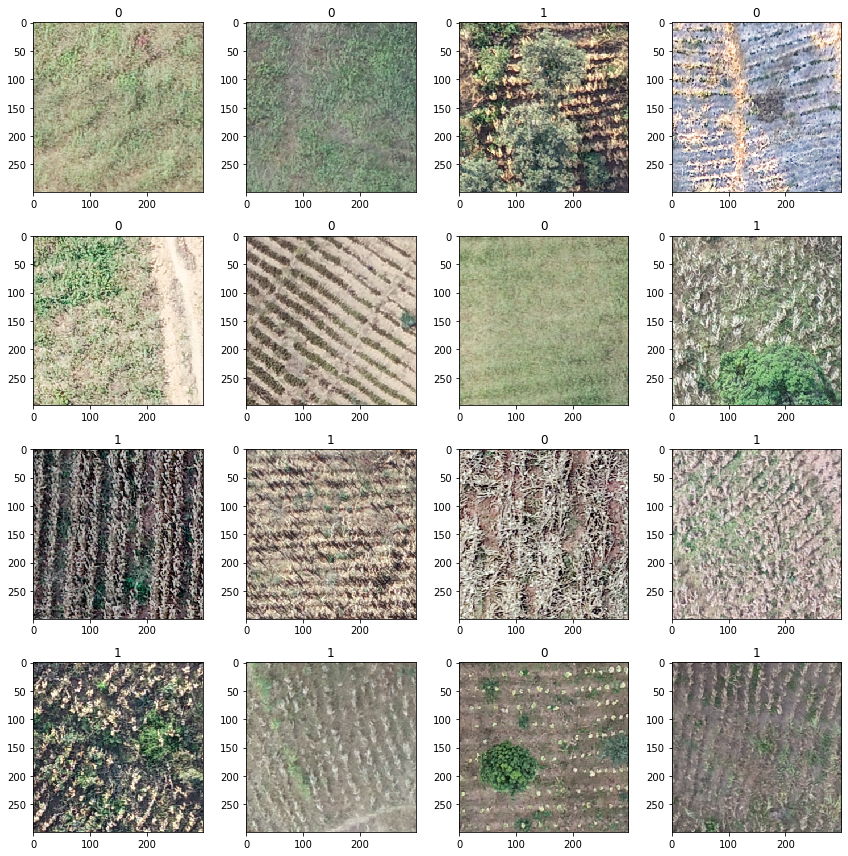

In [4]:
data = ImageLoader(df.index.values, (df.label.values == "maize").astype(int), label_encoding='binary', batch_size=15, balance=True, random_seed=1234)
data.show_random_samples(16, figsize=(12, 12));

In [22]:
results = pd.DataFrame(columns=['val-f1', 'val-precision', 'val-recall', 'test-f1', 'test-precision', 'test-recall'])

from glob import glob
from os.path import basename, exists
for experiment_path in glob(config['models_path']+'/*'):
    experiment = basename(experiment_path)
    try:
        with open(experiment_path + '/results-testing.json') as file:
            testing = json.load(file)
        with open(experiment_path + '/results-validation.json') as file:
            validation = json.load(file)
    except Exception as err:
        print('Could not process', experiment)
        #print(str(err))
        continue
    
    results.loc[experiment] = (
        f1_score(validation['targets'], validation['predictions'], average='macro'), 
        precision_score(validation['targets'], validation['predictions'], average='macro'), 
        recall_score(validation['targets'], validation['predictions'], average='macro'),
        f1_score(testing['targets'], testing['predictions'], average='macro'), 
        precision_score(testing['targets'], testing['predictions'], average='macro'), 
        recall_score(testing['targets'], testing['predictions'], average='macro'),
    )
    

Could not process xception-balanced-Annice
Could not process effnet-balanced-Cybil
Could not process xception-balanced-Adah


/home/jmrziglod/projects/env-tf2/env-tf2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jmrziglod/projects/env-tf2/env-tf2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Could not process xception-balanced-Christie
Could not process xception-balanced-Willamina


In [26]:
len(['m28',
 'm13',
 'm2',
 'm8',
 'm21',
 'm27',
 'm20',
 'm25',
 'm33',
 'm23',
 'm11',
 'm22',
 'm31',
 'm18',
 'm26',
 'm14',
 'm29',
 'm1',
 'm12',
 'm19',
 'm30',
 'm10',
 'm32',
 'm17',
 'm16',
 ''])

26

In [23]:
results.sort_values('val-f1')

,val-f1,val-precision,val-recall,test-f1,test-precision,test-recall
baseline-balanced-Henrie,0.114037,0.164499,0.169090,0.084734,0.112617,0.233763
effnet-balanced-Belicia,0.144000,0.112500,0.200000,0.121739,0.087500,0.200000
baseline-balanced-Catie,0.285880,0.341050,0.359421,0.233181,0.286930,0.371910
baseline-balanced-Kori,0.458890,0.490610,0.448633,0.498657,0.469601,0.547539
xception-balanced-Cody,0.543740,0.618666,0.623712,0.591090,0.600020,0.655598
xception-balanced-Kassi,0.592709,0.620738,0.733034,0.682852,0.715549,0.757873
xception-balanced-Alice,0.648895,0.700981,0.676730,0.578026,0.660961,0.617449
xception-balanced-Harmonie,0.680423,0.732454,0.683234,0.658686,0.692652,0.672352
xception-balanced-Karla,0.685514,0.721669,0.709730,0.631651,0.680224,0.640514
xception-balanced-Cathe,0.703691,0.839595,0.679642,0.596351,0.740172,0.600735


In [24]:
results.sort_values('test-f1')

,val-f1,val-precision,val-recall,test-f1,test-precision,test-recall
baseline-balanced-Henrie,0.114037,0.164499,0.169090,0.084734,0.112617,0.233763
effnet-balanced-Belicia,0.144000,0.112500,0.200000,0.121739,0.087500,0.200000
baseline-balanced-Catie,0.285880,0.341050,0.359421,0.233181,0.286930,0.371910
baseline-balanced-Kori,0.458890,0.490610,0.448633,0.498657,0.469601,0.547539
xception-balanced-Alice,0.648895,0.700981,0.676730,0.578026,0.660961,0.617449
xception-balanced-Cody,0.543740,0.618666,0.623712,0.591090,0.600020,0.655598
xception-balanced-Cathe,0.703691,0.839595,0.679642,0.596351,0.740172,0.600735
xception-balanced-Karla,0.685514,0.721669,0.709730,0.631651,0.680224,0.640514
xception-balanced-Harmonie,0.680423,0.732454,0.683234,0.658686,0.692652,0.672352
xception-balanced-Carleen,0.750586,0.761198,0.765114,0.667281,0.704211,0.677770
